# 1- Import libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import tensorflow as tf 
import keras 

# 2- Reading dataset 

In [2]:
data = pd.read_csv("/kaggle/input/airline-delay-cause-csv/Airline_Delay_Cause.csv")

# 3- Exploratory Data Analysis (EDA)

In [3]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [4]:
data.tail(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0
318016,2003,6,DL,Delta Air Lines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",3466.0,454.0,121.15,7.61,...,1.0,102.33,9.0,0.0,16853.0,5384.0,306.0,5686.0,28.0,5449.0


In [5]:
data.shape

(318017, 21)

In [6]:
data.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [8]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,318017.000000,318017.000000,317524.000000,317285.000000,317525.000000,317523.000000,317529.000000,317529.000000,317529.000000,317529.000000,317527.000000,317523.000000,317525.000000,317529.000000,317529.000000,317527.000000,317529.000000
mean,2012.450957,6.497844,381.766670,72.905076,21.073149,2.616407,24.005228,0.179037,24.975734,7.207257,0.867674,4209.989113,1286.577224,220.567542,1099.516422,7.214845,1596.062993
std,5.678296,3.459423,1027.156722,198.936754,47.671580,9.968640,85.113757,0.844834,75.275223,37.216301,3.915772,12519.021012,3515.417309,861.521440,4636.475908,38.854685,4924.950687
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.000000,0.000000,1.680000,0.000000,1.640000,0.000000,0.000000,436.000000,148.000000,0.000000,56.000000,0.000000,79.000000
50%,2012.000000,6.000000,120.000000,23.000000,8.190000,0.580000,5.490000,0.000000,5.860000,1.000000,0.000000,1201.000000,437.000000,25.000000,203.000000,0.000000,351.000000
75%,2018.000000,10.000000,273.000000,56.000000,19.690000,2.000000,15.350000,0.000000,17.040000,4.000000,1.000000,3080.000000,1100.000000,159.000000,602.000000,0.000000,1110.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


In [9]:
data.isnull().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

In [10]:
data.duplicated().sum()

0

# 4- Data Preprocessing 

In [11]:
data.head(2)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.0,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.0,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0


In [12]:
data.dropna(inplace = True)

In [13]:
data.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317261 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317261 non-null  int64  
 1   month                317261 non-null  int64  
 2   carrier              317261 non-null  object 
 3   carrier_name         317261 non-null  object 
 4   airport              317261 non-null  object 
 5   airport_name         317261 non-null  object 
 6   arr_flights          317261 non-null  float64
 7   arr_del15            317261 non-null  float64
 8   carrier_ct           317261 non-null  float64
 9   weather_ct           317261 non-null  float64
 10  nas_ct               317261 non-null  float64
 11  security_ct          317261 non-null  float64
 12  late_aircraft_ct     317261 non-null  float64
 13  arr_cancelled        317261 non-null  float64
 14  arr_diverted         317261 non-null  float64
 15  arr_delay            3

In [15]:
data["WDCase"] = data["weather_delay"].apply(lambda x : 1 if x > 100 else 0)

In [16]:
data["WDCase"].value_counts()

WDCase
0    215111
1    102150
Name: count, dtype: int64

# 5- Data Visualization 

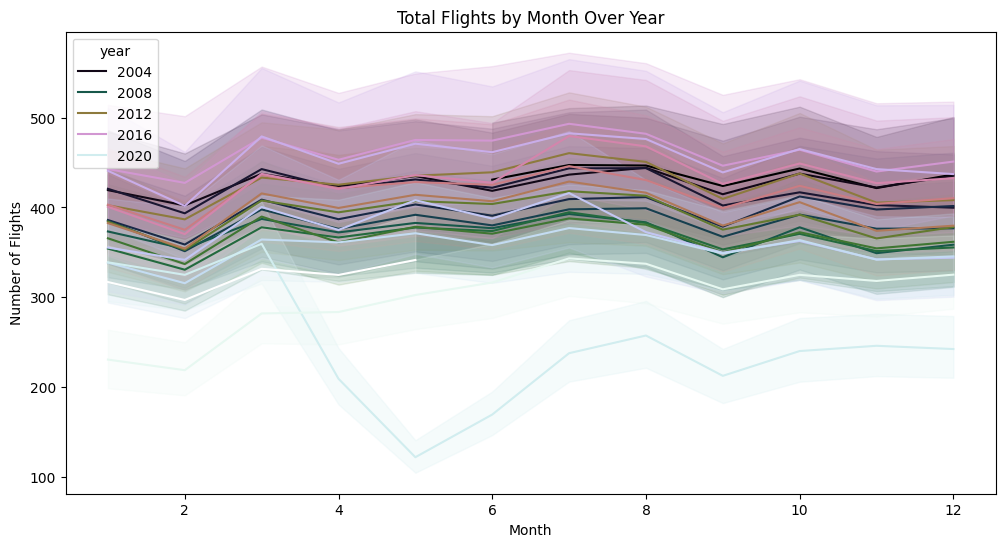

In [17]:
# Line Chart: Trend of total flights by month over a year.
sns.set_palette("cubehelix") 
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='arr_flights', data=data, hue='year', palette="cubehelix")  # إضافة palette لتحديد الألوان
plt.title("Total Flights by Month Over Year")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.show()

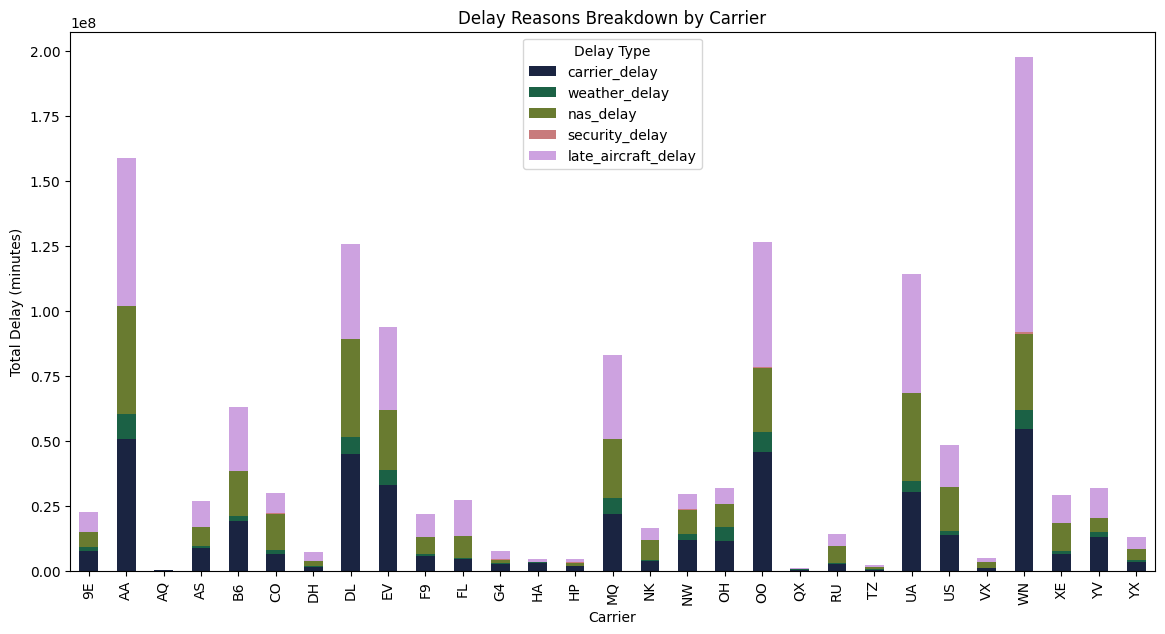

In [18]:
# Stacked Bar Chart: Breakdown of different delay reasons by carrier.
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_delay = data.groupby('carrier')[delay_types].sum().reset_index()

df_delay.set_index('carrier').plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Delay Reasons Breakdown by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Total Delay (minutes)")
plt.legend(title="Delay Type")
plt.show()

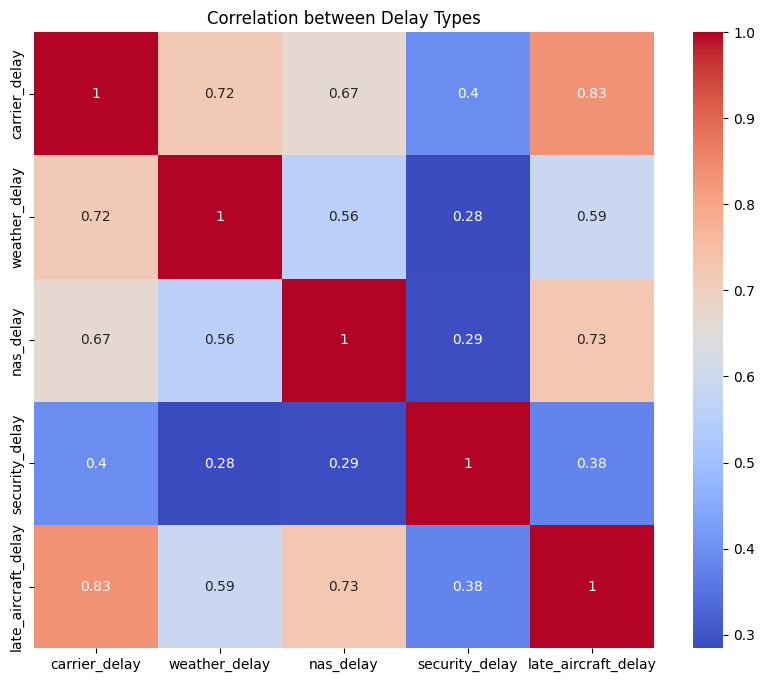

In [19]:
# Heatmap: Correlation of different delay factors.
plt.figure(figsize=(10, 8))
sns.heatmap(data[delay_types].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Delay Types")
plt.show()

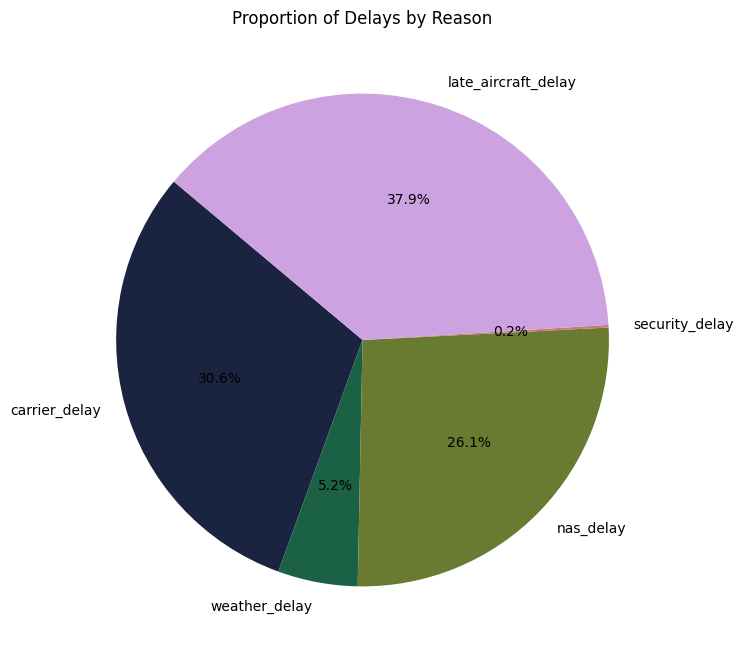

In [20]:
# Pie Chart: Proportion of delays by delay reason.
delay_sums = data[delay_types].sum()
plt.figure(figsize=(8, 8))
plt.pie(delay_sums, labels=delay_sums.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Delays by Reason")
plt.show()

# 6- Spiliting the data 

In [21]:
data = data.drop(["carrier" , "carrier_name" , "airport" ,"airport_name"] , axis = 1)

In [22]:
data.head(1)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.0,0.05,0.0,1.0,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0


In [23]:
X = data.drop(["WDCase"] , axis =1)
y = data["WDCase"]

In [24]:
X.columns

Index(['year', 'month', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [25]:
y.unique()

array([0, 1])

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 , shuffle =True)

In [27]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (253808, 17)
X_test shape is  (63453, 17)
y_train shape is  (253808,)
y_test shape is  (63453,)


# 7- Building the model (DNN)

In [28]:
Keras_Model = keras.models.Sequential([
    keras.layers.Dense( 8 , activation= 'tanh'),
    keras.layers.Dense( 128 , activation = 'tanh'),
    keras.layers.Dense( 32 , activation= 'tanh'),
    keras.layers.Dense(1 , activation = 'sigmoid')
])

In [29]:
Keras_Model.compile(
    optimizer = 'adam' ,
    loss = 'binary_crossentropy',
    metrics = ["accuracy"]
)

# 8- Training the model

In [30]:
history = Keras_Model.fit(X_train, 
        y_train,
        validation_data = (X_test, y_test),
        epochs = 100 ,
        batch_size = 10000 ,
        verbose = 1 ,
        callbacks = [ tf.keras.callbacks.EarlyStopping(
            patience = 10 ,
            monitor = 'val_accuracy',
            restore_best_weights = True)]
)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7251 - loss: 0.5385 - val_accuracy: 0.7800 - val_loss: 0.4463
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7757 - loss: 0.4426 - val_accuracy: 0.7811 - val_loss: 0.4243
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7847 - loss: 0.4166 - val_accuracy: 0.8025 - val_loss: 0.3976
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8079 - loss: 0.3886 - val_accuracy: 0.8356 - val_loss: 0.3538
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8391 - loss: 0.3440 - val_accuracy: 0.8470 - val_loss: 0.3107
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8538 - loss: 0.3025 - val_accuracy: 0.8653 - val_loss: 0.2789
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8706 - loss: 0.2712 - val_accuracy: 0.8817 - val_loss: 0.2504
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8797 - loss: 0.2455 - val_accuracy: 0.

In [31]:
Keras_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,373 (63.96 KB)

 Trainable params: 5,457 (21.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,916 (42.64 KB)

# 9- Saving the model 

In [32]:
Keras_Model.save('DNN_Binary_Classification.keras')

# 10- Loading the model

In [33]:
model = keras.models.load_model('DNN_Binary_Classification.keras')

# 11- Evaluating the model 

In [34]:
y_pred = model.predict(X_test)

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [35]:
y_pred[:11]

array([[9.9987650e-01],
       [1.3138646e-03],
       [7.6343125e-04],
       [1.5272174e-04],
       [9.9711579e-01],
       [9.9976403e-01],
       [9.9989438e-01],
       [9.9989438e-01],
       [5.2327691e-03],
       [7.1579771e-04],
       [9.9986178e-01]], dtype=float32)

In [36]:
model_loss , model_accuracy = model.evaluate(X_test,y_test)
print(f"Model Loss is {model_loss}")
print(f"Model Accuracuy is {model_accuracy}")

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9994 - loss: 0.0022
Model Loss is 0.0021254809107631445
Model Accuracuy is 0.9994799494743347


# 12- Plotting the Accuracy 

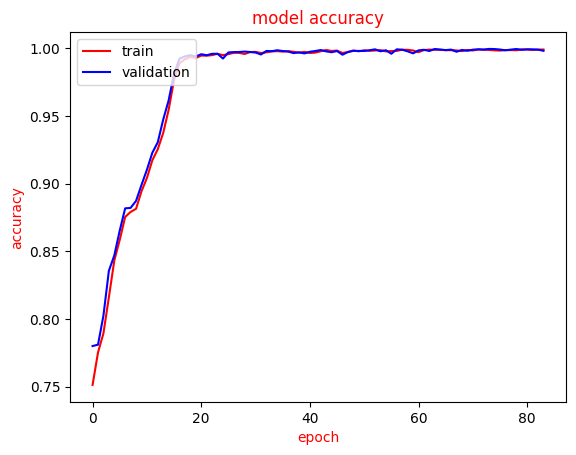

In [37]:
plt.plot(history.history['accuracy'], color ='red')
plt.plot(history.history['val_accuracy'], color ='blue')
plt.title('model accuracy', color ='red')
plt.ylabel('accuracy', color ='red')
plt.xlabel('epoch', color ='red')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

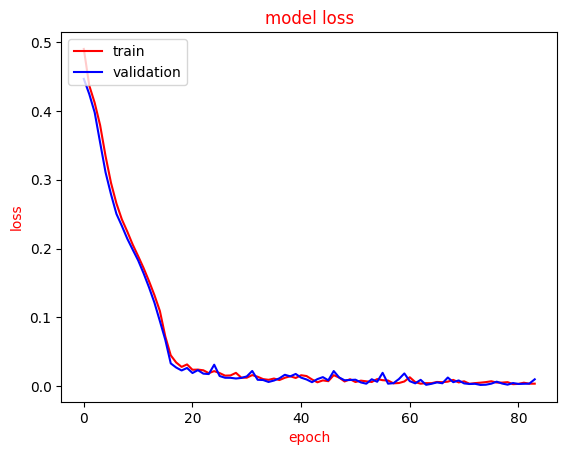

In [38]:
plt.plot(history.history['loss'], color ='red')
plt.plot(history.history['val_loss'], color ='blue')
plt.title('model loss' , color ='red')
plt.ylabel('loss', color ='red')
plt.xlabel('epoch', color ='red')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 13- Deployment using **flask** 

In [39]:
from flask import Flask , jsonify , request 
import numpy as np 
import joblib 
import os
from tensorflow.keras.models import load_model 

model_path = '/kaggle/working/DNN_Binary_Classification.keras'

try:
    model = load_model(model_path)
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

app = Flask(__name__) 

@app.route("/predict" , methods = ['POST'])

def receive_data():
    data = request.json
    response = predict(data)
    return jsonify(response)


def predict(data):
    if request.method == 'POST':

        result = []
        for entry in data:
            year = entry["year"]
            month = entry["month"]
            arr_flights = entry["arr_flights"]
            arr_del15 = entry["arr_del15"]
            carrier_ct = entry["carrier_ct"]
            weather_ct = entry["weather_ct"]
            nas_ct = entry["nas_ct"]
            security_ct = entry["security_ct"]
            late_aircraft_ct = entry["late_aircraft_ct"]
            arr_cancelled = entry["arr_cancelled"]
            arr_diverted = entry["arr_diverted"]
            arr_delay = entry["arr_delay"]
            carrier_delay = entry["carrier_delay"]
            weather_delay = entry["weather_delay"]
            nas_delay = entry["nas_delay"]
            security_delay = entry["security_delay"]
            late_aircraft_delay = entry["late_aircraft_delay"]

            
        features = np.array([[year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay]])

        prediction = model.predict(features)

        if prediction == 0 :
            result.append({'WDCase' : 'No'})

        if prediction == 1 :
            result.append({'WDCase' : 'Yes'})

    return result

if __name__ == 'main':
    app.run(debug=True)